In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

In [3]:

df_bots = pd.read_csv("../parsed_data/bots.csv")
df_bots["bot"] = 1
df_bots

,session_id,Total_requests,Total_Bytes,Total_GET_requests,Total_POST_requests,Total_3xx_responses,Total_4xx_responses,per_image_requests,per_css_request,per_js_requests,Depth_SD,Max_requests_per_page,Average_requests_per_page,Max_sequential_request,per_sequential_requests,Session_time,Browsing_speed,SD_request_time,bot
0,97hf7ciplt2k54f5j6109nekn0,157,70114,8,149,0.0,0.0,0.0,0.006369,0.031847,0.112145,143,15.700000,157,1.0,277.0,0.036101,0.587992,1
1,46hm95bnvnuglhj1i1906nc80u,29,24199,16,13,0.0,0.0,0.0,0.137931,0.172414,0.405081,9,2.636364,29,1.0,11.0,1.000000,0.665079,1
2,mtilohhtbsshka38svllisk0am,18,17012,9,9,0.0,0.0,0.0,0.055556,0.277778,0.314270,8,1.800000,18,1.0,15.0,0.666667,0.957427,1
3,66vt430cgmgpus1k96japf46pf,326,200283,43,283,0.0,0.0,0.0,0.003067,0.015337,0.306518,264,16.300000,326,1.0,512.0,0.039062,0.813757,1
4,igirlpfg3oft6i3dl8ah549gqi,319,222003,40,279,0.0,0.0,0.0,0.003135,0.015674,0.335409,262,13.869565,319,1.0,528.0,0.043561,0.799822,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,ahpte8dp0s8io8sd28orasfpkj,211,88926,18,193,0.0,0.0,0.0,0.004739,0.023697,0.137686,193,13.187500,211,1.0,189.0,0.084656,0.305605,1
420,6t1t0stce6afdl4ob3hl152fnj,306,133309,23,283,0.0,0.0,0.0,0.003268,0.016340,0.161558,283,15.300000,306,1.0,273.0,0.073260,0.330583,1
421,3d46kbg48go8hu4srfkogn5p27,384,157312,27,357,0.0,0.0,0.0,0.002604,0.013021,0.160616,357,18.285714,384,1.0,349.0,0.060172,0.305377,1
422,c4icboll633l807dsum9a4jf6f,377,152601,24,353,0.0,0.0,0.0,0.002653,0.013263,0.144799,353,19.842105,377,1.0,343.0,0.055394,0.286448,1


In [4]:
df_hum = pd.read_csv("../parsed_data/human.csv")
df_hum["bot"] = 0
df_hum

,session_id,Total_requests,Total_Bytes,Total_GET_requests,Total_POST_requests,Total_3xx_responses,Total_4xx_responses,per_image_requests,per_css_request,per_js_requests,Depth_SD,Max_requests_per_page,Average_requests_per_page,Max_sequential_request,per_sequential_requests,Session_time,Browsing_speed,SD_request_time,bot
0,g2gh9qmk9krld14h5uojlg7g10,212,132953,29,183,0.0,0.0,0.0,0.004717,0.023585,0.376059,172,12.470588,212,1.0,336.0,0.050595,0.799386,0
1,kaodsjbnqm7umgfvao63d3rihb,298,203311,36,262,0.0,0.0,0.0,0.003356,0.016779,0.322375,249,15.684211,298,1.0,484.0,0.039256,0.759517,0
2,1aqgqrcuurlmvvbbpirvsh7e53,206,128459,32,174,0.0,0.0,0.0,0.009709,0.024272,0.387651,162,12.117647,206,1.0,311.0,0.054662,0.851841,0
3,igbeqcjnbst8afmoi4sg6tn669,188,180779,39,149,0.0,0.0,0.0,0.058511,0.026596,0.299530,139,11.058824,188,1.0,269.0,0.063197,0.869400,0
4,vopb1c4o3o2dpsov8jinbbou5h,348,218947,52,296,0.0,0.0,0.0,0.045977,0.014368,0.302367,281,19.333333,348,1.0,547.0,0.032907,0.811562,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,a3novvctivmjtfh19pehjqing5,63,28719,7,56,0.0,0.0,0.0,0.015873,0.079365,0.124984,56,7.875000,63,1.0,29.0,0.275862,0.558496,0
386,itltb3mfbii9h9ikttfqkc3ca2,26,19425,11,15,0.0,0.0,0.0,0.038462,0.269231,0.192308,15,2.600000,26,1.0,15.0,0.666667,0.494047,0
387,f8vvptugepi32i09gotgtjb50d,1,1758,1,0,0.0,1.0,0.0,0.000000,0.000000,0.000000,1,1.000000,1,1.0,0.0,0.000000,0.000000,0
388,upgqfre5gn72uks220ag27idir,1,1758,1,0,0.0,1.0,0.0,0.000000,0.000000,0.000000,1,1.000000,1,1.0,0.0,0.000000,0.000000,0


In [6]:
df_merged = pd.concat([df_bots, df_hum], ignore_index=True, sort=False)

In [7]:
df_merged

,session_id,Total_requests,Total_Bytes,Total_GET_requests,Total_POST_requests,Total_3xx_responses,Total_4xx_responses,per_image_requests,per_css_request,per_js_requests,Depth_SD,Max_requests_per_page,Average_requests_per_page,Max_sequential_request,per_sequential_requests,Session_time,Browsing_speed,SD_request_time,bot
0,97hf7ciplt2k54f5j6109nekn0,157,70114,8,149,0.0,0.0,0.0,0.006369,0.031847,0.112145,143,15.700000,157,1.0,277.0,0.036101,0.587992,1
1,46hm95bnvnuglhj1i1906nc80u,29,24199,16,13,0.0,0.0,0.0,0.137931,0.172414,0.405081,9,2.636364,29,1.0,11.0,1.000000,0.665079,1
2,mtilohhtbsshka38svllisk0am,18,17012,9,9,0.0,0.0,0.0,0.055556,0.277778,0.314270,8,1.800000,18,1.0,15.0,0.666667,0.957427,1
3,66vt430cgmgpus1k96japf46pf,326,200283,43,283,0.0,0.0,0.0,0.003067,0.015337,0.306518,264,16.300000,326,1.0,512.0,0.039062,0.813757,1
4,igirlpfg3oft6i3dl8ah549gqi,319,222003,40,279,0.0,0.0,0.0,0.003135,0.015674,0.335409,262,13.869565,319,1.0,528.0,0.043561,0.799822,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,a3novvctivmjtfh19pehjqing5,63,28719,7,56,0.0,0.0,0.0,0.015873,0.079365,0.124984,56,7.875000,63,1.0,29.0,0.275862,0.558496,0
810,itltb3mfbii9h9ikttfqkc3ca2,26,19425,11,15,0.0,0.0,0.0,0.038462,0.269231,0.192308,15,2.600000,26,1.0,15.0,0.666667,0.494047,0
811,f8vvptugepi32i09gotgtjb50d,1,1758,1,0,0.0,1.0,0.0,0.000000,0.000000,0.000000,1,1.000000,1,1.0,0.0,0.000000,0.000000,0
812,upgqfre5gn72uks220ag27idir,1,1758,1,0,0.0,1.0,0.0,0.000000,0.000000,0.000000,1,1.000000,1,1.0,0.0,0.000000,0.000000,0


In [11]:
X = df_merged.iloc[:, 1:-1].values
Y = df_merged.iloc[:, -1].values

In [12]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Accuracy: 87.12%


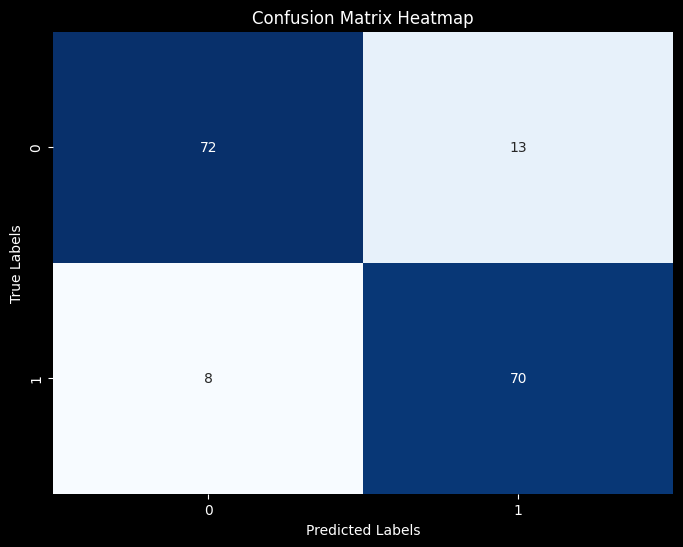

In [17]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()